# Coding Challenge 5

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [5]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [2]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.669998,383.614990,1.262834,1214.599976,45.900002,16804.710938
2014-10-02,124.169998,375.071991,1.262419,1214.199951,45.759998,16801.050781
2014-10-03,126.360001,359.511993,1.267058,1192.199951,46.090000,17009.689453
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,251.490005,34323.050781
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,249.309998,34464.640625
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,249.679993,34529.449219


In [3]:
ba = close.BA.dropna().copy().to_frame().rename(columns = {"BA": "Price"})
ba

,Price
Date,
2014-10-01,124.669998
2014-10-02,124.169998
2014-10-03,126.360001
2014-10-06,126.260002
2014-10-07,123.320000
...,...
2021-05-24,237.440002
2021-05-25,240.740005
2021-05-26,241.369995


In [4]:
ba["log_return"] = np.log(ba.Price / ba.Price.shift()) # daily log returns (log of current price divided by the previous price)
ba

,Price,log_return
Date,,
2014-10-01,124.669998,NaN
2014-10-02,124.169998,-0.004019
2014-10-03,126.360001,0.017483
2014-10-06,126.260002,-0.000792
2014-10-07,123.320000,-0.023561
...,...,...
2021-05-24,237.440002,0.011096
2021-05-25,240.740005,0.013803
2021-05-26,241.369995,0.002613


<Axes: xlabel='Date'>

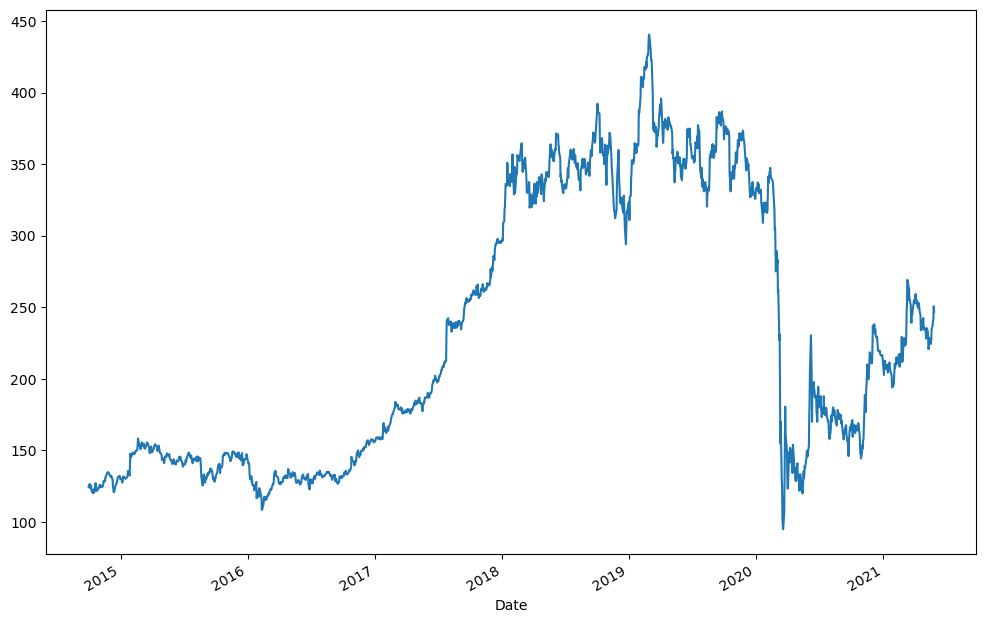

In [12]:
ba.Price.plot(figsize = (12, 8))

In [9]:
ann_mu = ba.log_return.mean() * 252 # annualised mean return
ann_mu

0.10281466040592156

In [11]:
ann_std = ba.log_return.std() * np.sqrt(252) # annualised std of returns
ann_std

0.4181796243706362

In [13]:
monthly = ba.Price.resample("M").last() # resample to monthly (month end)
monthly

Date
2014-10-31   124.910004
2014-11-30   134.360001
2014-12-31   129.979996
2015-01-31   145.369995
2015-02-28   150.850006
                ...    
2021-01-31   194.190002
2021-02-28   212.009995
2021-03-31   254.720001
2021-04-30   234.309998
2021-05-31   247.020004
Freq: M, Name: Price, Length: 80, dtype: float64

<Axes: xlabel='Date'>

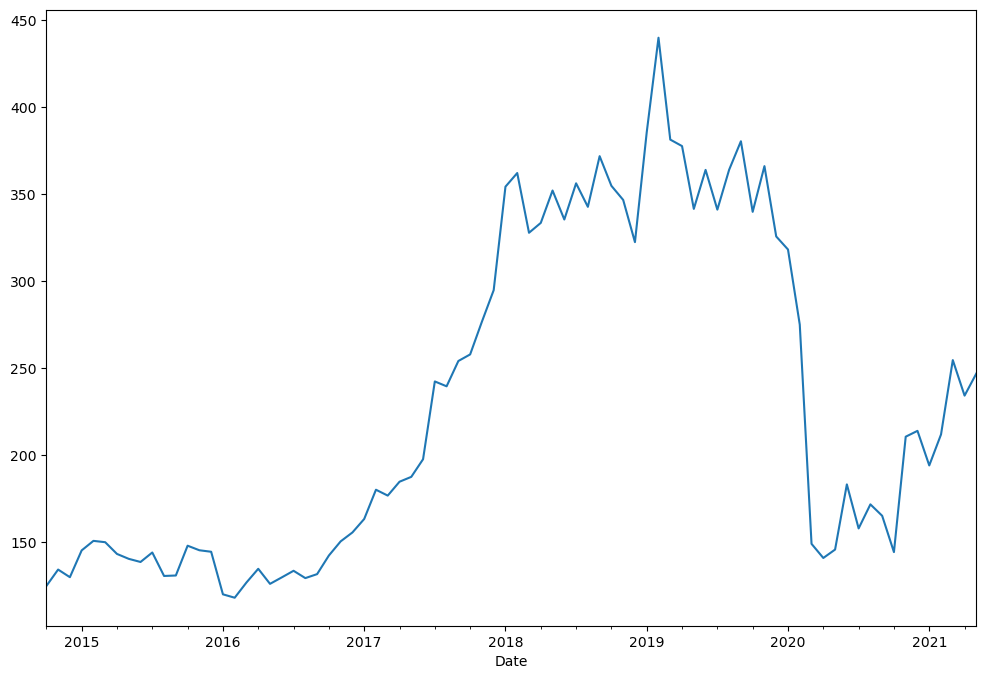

In [22]:
monthly.plot(figsize = (12, 8))

In [27]:
monthly_ann_std = monthly.std() * np.sqrt(12) # annualised std of returns
monthly_ann_std

330.05995230031726

<Axes: xlabel='Date'>

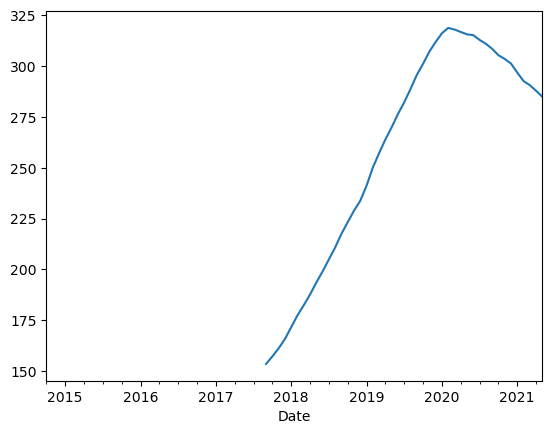

In [28]:
monthly.rolling(36).mean().plot()